<a href="https://colab.research.google.com/github/rajy4683/S7EVA4/blob/master/S7EVA4_SingleScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [3]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |████████████████████████████████| 112kB 4.9MB/s 
     |████████████████████████████████| 1.4MB 15.0MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
     |████████████████████████████████| 102kB 15.9MB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
     |████████████████████████████████| 460kB 68.1MB/s 
     |████████████████████████████████| 71kB 12.4MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=5b76fcebe6f80890cf907f1f9f5632e8bf77c7d1fd08345a9a1571c44ca22837
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=a58c7d275b9caf52325178f9ede8d8748047c002630ee7a9382b23fd62fb6a80
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filenam

#### WANDB client login

In [4]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

train_s7_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```
This script will be enhanced to handle the following:


1. Inferencing from a saved model
2. Loading and retraining the model
3. Displaying run results from a saved model.
4. Samples of train/test loader data

All the above functions are implemented already as APIs in the RekogNizer library.


Finally the training run!

In [6]:
!python /content/drive/My\ Drive/EVA4/train_s7_new.py -p '{"lr":0.01,"dropout":0.13596276898345358, "momentum":0.9514506908463995, "epochs":30}' 

170500096it [00:03, 42743216.63it/s]                   
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
0.001
Setting  lr  =  0.01
Setting  dropout  =  0.13596276898345358
Setting  momentum  =  0.9514506908463995
Setting  epochs  =  30
Final Hyperparameters
             dropout : 0.13596276898345358 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.01 
            momentum : 0.9514506908463995 
             no_cuda : False 
                seed : 1 
              epochs : 30 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
             project : news5 
wandb: Tracking run with wandb version 0.8.28
wandb: Run data is saved locally in wandb/run-20200303_180825-0yiy1pme
wandb: Syncing run crisp-serenity-766
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at https://app.wandb.ai/rajy4683/news5/runs

In [7]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

Files already downloaded and verified
Files already downloaded and verified


crisp-serenity-766


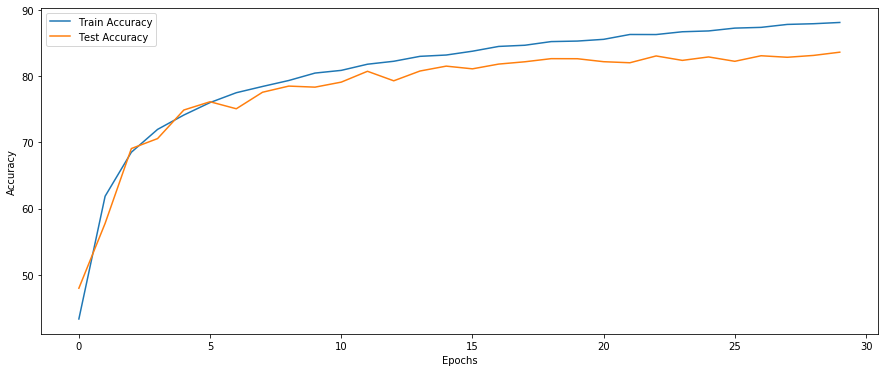

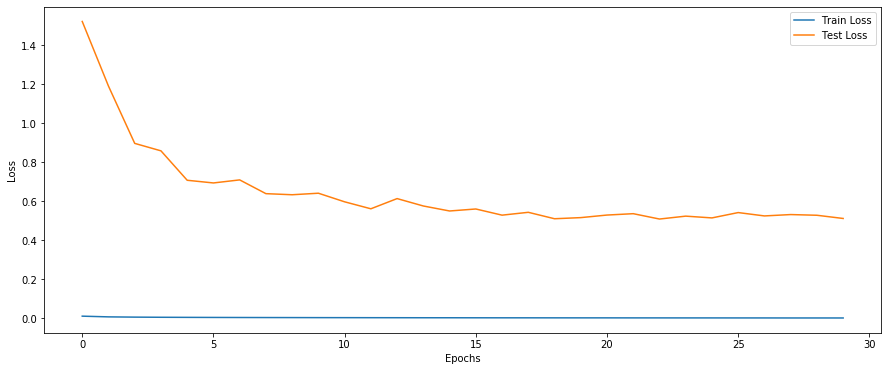

In [8]:


runs_df = logger.get_wandb_dataframes_proj(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [9]:
my_model = traintest.model_builder(basemodelclass.CIFARModelDepthDilate, weights_path="/content/drive/My Drive/EVA4/model_saves/model-20f5076a80.h5")
class_accuracy_dict = traintest.classwise_accuracy(my_model, dataloader.testloader, dataloader.classes, device=torch.device("cpu"))

Accuracy of plane : 82 %
Accuracy of   car : 89 %
Accuracy of  bird : 72 %
Accuracy of   cat : 69 %
Accuracy of  deer : 81 %
Accuracy of   dog : 71 %
Accuracy of  frog : 87 %
Accuracy of horse : 87 %
Accuracy of  ship : 89 %
Accuracy of truck : 89 %


<BarContainer object of 10 artists>

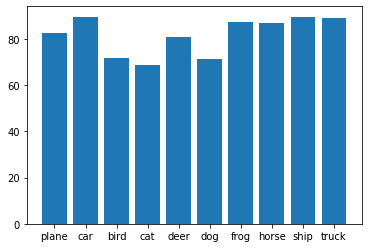

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

In [12]:
from torchsummary import summary
device = torch.device("cuda")
summary(my_model.to(device),input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,024
       BatchNorm2d-7           [-1, 32, 32, 32]              64
              ReLU-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
          Dropout-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
          Dropout-14           [-1, 64,